In [395]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2_contingency

In [396]:
#Import data
otter_data_csv = "./Resources/example_data/altered_otter_data_compiled.csv"

In [397]:
#Read data
otter_data = pd.read_csv(otter_data_csv)

In [398]:
#Convert data to DataFrame
otter_data_df = pd.DataFrame(otter_data)

In [399]:
#Check Data types
otter_data_df.dtypes

Location          object
Survey #           int64
Camera #          object
SD Card           object
Animal Sighted    object
Animal Count       int64
dtype: object

In [400]:
#Check columns
list(otter_data_df.columns)

['Location',
 'Survey #',
 'Camera #',
 'SD Card',
 'Animal Sighted',
 'Animal Count']

In [401]:
#Get a list of all animals sighted
animal_sighted_list = otter_data_df["Animal Sighted"].unique()
animal_sighted_list

animal_sighted_list_sorted = sorted(animal_sighted_list)
animal_sighted_list_sorted

['American Coot',
 'American Dipper',
 'American Wigeon',
 'Bat',
 'Beaver',
 'Bee',
 'Black Bear',
 'Bobcat',
 "Bullock's Oriole",
 'Butterflies',
 'Canada Goose',
 'Cat',
 'Common Goldeneye',
 'Common Merghansar',
 'Cow',
 'Dark-eyed Junco',
 'Domestic Cat',
 'Domestic Dog',
 'Dragonfly',
 'Eagle',
 'Elk',
 'Finch',
 'Fireflies',
 'Fish (unidentified)',
 'Fox',
 'Gadwall Ducks',
 'Great Blue Heron',
 'Great-Tailed Grackle',
 'Hawk',
 'Hawk (unidentified)',
 'House Cat',
 'Hummingbird',
 'Killdeer',
 'Magpie',
 'Mallard Duck',
 'Mink',
 'Moth',
 'Mountain Lion',
 'Mourning Dove',
 'Mouse',
 'Mule Deer',
 'Muskrat',
 'Osprey',
 'Otter',
 'Owl',
 'Pelican',
 'Raccoon',
 'Red-Winged Blackbird',
 'Robin',
 'Rodent (unknown species)',
 'Sandhill Crane',
 'Sea Gull',
 'Skunk',
 'Sparrow',
 'Spotted Sandpiper',
 'Swallow',
 'Trout',
 'Unidentified Dove',
 'Unidentified Duck',
 'Unidentified Fish',
 'Unidentified bird',
 'Unknown Bird',
 'Wasp',
 "Wilson's Snipe",
 'Wood Duck',
 'Yellow Heade

In [402]:
#Clean misspelled or close-duplicate Animals Sighted. Make a new cleaned dataframe
cleaned_otter_data_df = otter_data_df.replace(
    {"Common Merghansar": "Common Merghanser", 
     "Cat": "Domestic Cat", "House Cat": "Domestic Cat", 
     "Hawk": "Hawk (unidentified)",
     "Mallard Ducks": "Mallard Duck",
     "Pelicans": "Pelican",
     "Rodent (unknown species)": "Unidentified Rodent", "Rodent (unidentified)": "Unidentified Rodent",
     "Swallows": "Swallow",
     "Unidentified bird": "Unidentified Bird", "Unknown Bird": "Unidentified Bird",
     "Unknown Mammal": "Unidentified Mammal",
     "Fish (unidentified)": "Unidentified Fish",  
})
cleaned_otter_data_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
0,Lower Provo River,1,1,NaN,Killdeer,1
1,Lower Provo River,1,1,NaN,Skunk,1
2,Lower Provo River,1,1,NaN,Pelican,1
3,Lower Provo River,1,2,NaN,Bullock's Oriole,1
4,Lower Provo River,1,2,NaN,Killdeer,1
...,...,...,...,...,...,...
304,Weber River,7,1,NaN,Yellow Headed Blackbird,1
305,Weber River,8,1,NaN,Killdeer,1
306,Weber River,8,1,NaN,Eagle,1
307,Weber River,8,1,NaN,Magpie,1


In [403]:
#Get rid of any duplicates in cleaned dataframe
cleaned_otter_data_df[cleaned_otter_data_df.duplicated(keep=False)]
cleaned_otter_data_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
0,Lower Provo River,1,1,NaN,Killdeer,1
1,Lower Provo River,1,1,NaN,Skunk,1
2,Lower Provo River,1,1,NaN,Pelican,1
3,Lower Provo River,1,2,NaN,Bullock's Oriole,1
4,Lower Provo River,1,2,NaN,Killdeer,1
...,...,...,...,...,...,...
304,Weber River,7,1,NaN,Yellow Headed Blackbird,1
305,Weber River,8,1,NaN,Killdeer,1
306,Weber River,8,1,NaN,Eagle,1
307,Weber River,8,1,NaN,Magpie,1


In [688]:
#Get number of unique animals sighted (total number of species sighted)
cleaned_animal_sighted_list = cleaned_otter_data_df["Animal Sighted"].unique()
cleaned_animal_sighted_list

cleaned_animal_sighted_list_sorted = sorted(cleaned_animal_sighted_list)
cleaned_animal_sighted_list_sorted_count = len(cleaned_animal_sighted_list_sorted)
cleaned_animal_sighted_list_sorted_count

61

In [405]:
#Count up how many times each species was sighted, overall
animal_sighted_totals_df = pd.DataFrame(cleaned_otter_data_df["Animal Sighted"].value_counts())
animal_sighted_totals_df.columns =["Count"]
animal_sighted_totals_df

,Count
Animal Sighted,
Yellow Headed Blackbird,30
Beaver,27
Killdeer,25
Sandhill Crane,19
Magpie,16
...,...
Skunk,1
Wasp,1
Unidentified Rodent,1


In [406]:
#Get the total number of animal sightings, overall
total_animal_sightings_count = cleaned_otter_data_df["Animal Sighted"].count()
total_animal_sightings_count

309

Text(0, 0.5, 'Number of Sightings')

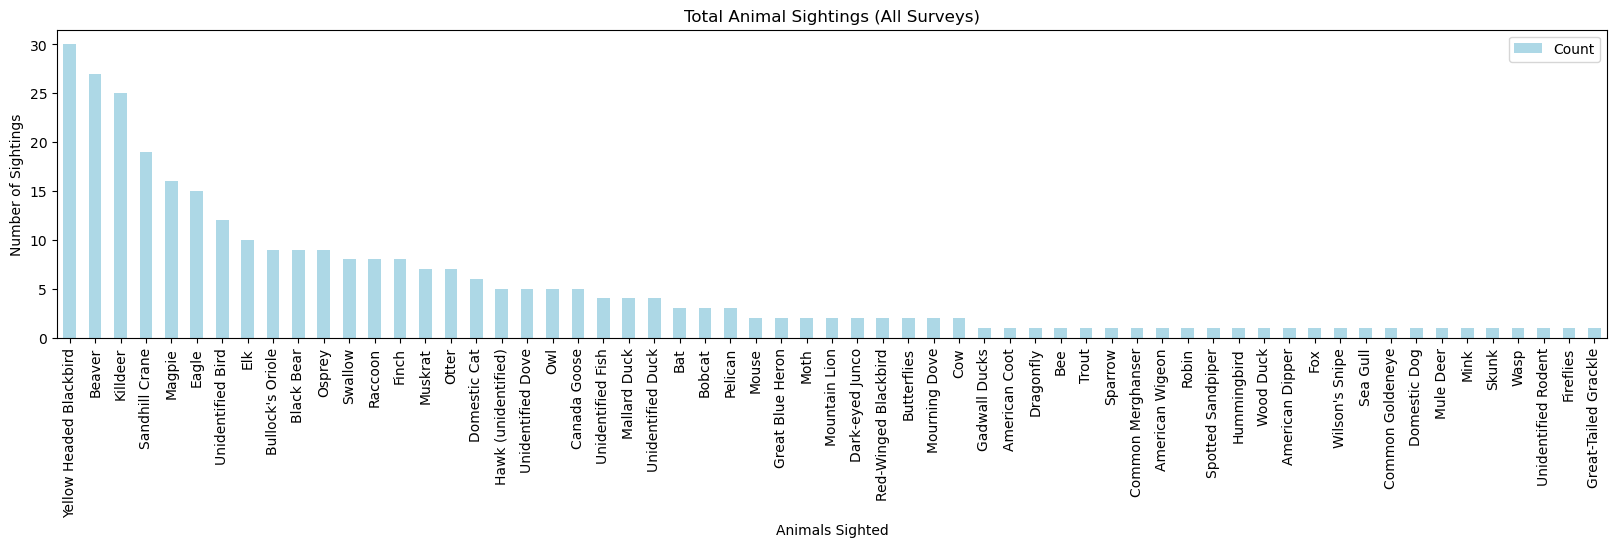

In [407]:
#Graph total animal sightings for each species from all surveys
animal_sighted_totals_df_graph = animal_sighted_totals_df.plot(kind="bar", facecolor="lightblue", figsize=(20,4))
plt.title("Total Animal Sightings (All Surveys)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")

Text(0, 0.5, 'Number of Sightings')

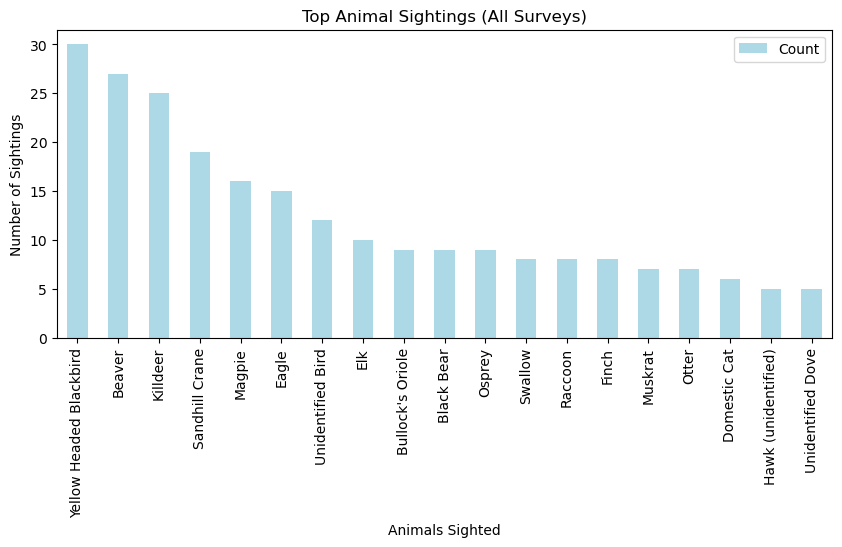

In [408]:
#Graph top animal sightings from all surveys
top_animal_sighted_totals_df_graph = animal_sighted_totals_df.head(19).plot(kind="bar", facecolor="lightblue", figsize=(10,4))
plt.title("Top Animal Sightings (All Surveys)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")

In [419]:
#Create a new dataframe of Lower Provo River data
lower_provo_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Lower Provo River"]
lower_provo_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
0,Lower Provo River,1,1,NaN,Killdeer,1
1,Lower Provo River,1,1,NaN,Skunk,1
2,Lower Provo River,1,1,NaN,Pelican,1
3,Lower Provo River,1,2,NaN,Bullock's Oriole,1
4,Lower Provo River,1,2,NaN,Killdeer,1
...,...,...,...,...,...,...
63,Lower Provo River,19,NaN,A,Raccoon,1
64,Lower Provo River,19,NaN,A,Unidentified Bird,1
65,Lower Provo River,19,NaN,A,Bullock's Oriole,1
66,Lower Provo River,19,NaN,A,Cow,1


In [599]:
#Get a count of animals sightings for each individual survey within the Lower Provo River
lpr_survey_number_totals_df = pd.DataFrame(lower_provo_river_df["Survey #"].value_counts())
lpr_survey_number_totals_df.columns =["LPR Count"]
lpr_survey_number_totals_df

,LPR Count
Survey #,
3,18
1,12
2,11
4,10
19,7
10,5
8,3
6,2


In [620]:
#Sort Lower Prover River survey animal sighting counts from lowest survey # to highest
lpr_survey_number_totals_df_sorted = lpr_survey_number_totals_df.sort_values(["Survey #"], ascending=True)
lpr_survey_number_totals_df_sorted

,LPR Count
Survey #,
1,12
2,11
3,18
4,10
6,2
8,3
10,5
19,7


In [623]:
#Get summary stats of Lower Prover River survey animal sighting counts
lpr_survey_number_totals_df_sorted.describe()

,LPR Count
count,8.000000
mean,8.500000
std,5.318432
min,2.000000
25%,4.500000
50%,8.500000
75%,11.250000
max,18.000000


(0.0, 20.0)

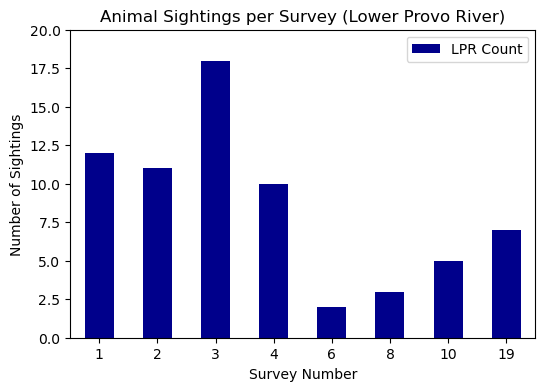

In [621]:
#Create graph of animal sightings per survey # in the Lower Provo River
lpr_survey_number_totals_df_sorted_graph = lpr_survey_number_totals_df_sorted.plot(kind="bar", facecolor="darkblue", figsize=(6,4))
plt.title("Animal Sightings per Survey (Lower Provo River)")
plt.xlabel("Survey Number")
plt.xticks(rotation=0)
plt.ylabel("Number of Sightings")
plt.ylim(0,20)

In [463]:
#Create a dataframe of the number of animal sightings per species sighted in the Lower Provo River
lpr_animal_sighted_totals_df = pd.DataFrame(lower_provo_river_df["Animal Sighted"].value_counts())
lpr_animal_sighted_totals_df.columns =["LPR Count"]
lpr_animal_sighted_totals_df


,LPR Count
Animal Sighted,
Beaver,7
Killdeer,6
Raccoon,6
Swallow,6
Magpie,6
Bullock's Oriole,5
Yellow Headed Blackbird,5
Unidentified Dove,3
Unidentified Fish,3


In [464]:
#Get a count of the total number of animal sightings in the Lower Provo River
lpr_total_animal_sightings_count = lower_provo_river_df["Animal Sighted"].count()
lpr_total_animal_sightings_count

68

In [682]:
#Get a count of the number of different species sighted in the Lower Provo River
lpr_animal_sighted_list = lower_provo_river_df["Animal Sighted"].unique()
lpr_animal_sighted_list_count = len(lpr_animal_sighted_list)
lpr_animal_sighted_list_count


24

(0.0, 25.0)

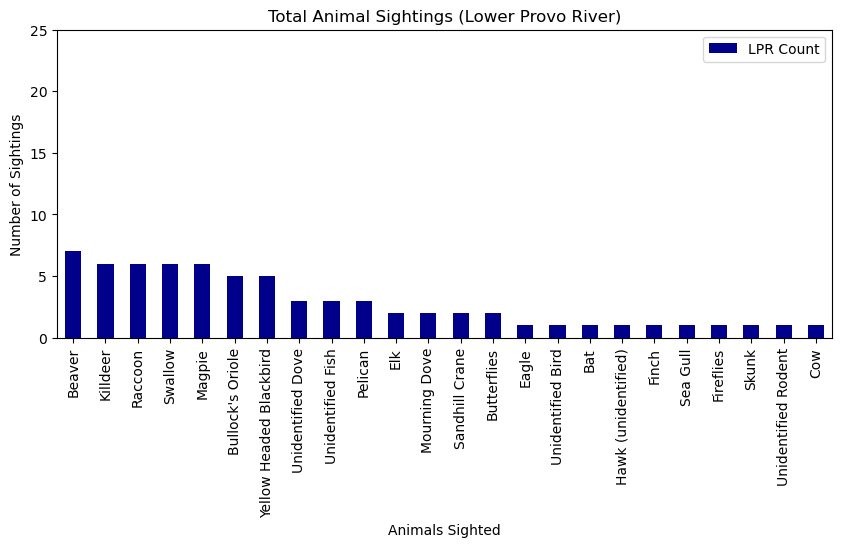

In [689]:
#Graph the total animal sightings for each species in the Lower Provo River
lpr_animal_sighted_totals_df_graph = lpr_animal_sighted_totals_df.plot(kind="bar", facecolor="darkblue", figsize=(10,4))
plt.title("Total Animal Sightings (Lower Provo River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [466]:
#Get a list of the Lower Provo River survey #s
lpr_survey_number_list = lower_provo_river_df["Survey #"].unique()

lpr_survey_number_list_sorted = sorted(lpr_survey_number_list)
lpr_survey_number_list_sorted

[1, 2, 3, 4, 6, 8, 10, 19]

In [467]:
#Create a dataframe with animal sighting totals for each Survey # in the Lower Provo River
lpr_survey_number_totals_df = pd.DataFrame(lower_provo_river_df["Survey #"].value_counts())
lpr_survey_number_totals_df.columns =["Animal Sightings Count"]
lpr_survey_number_totals_df

,Animal Sightings Count
Survey #,
3,18
1,12
2,11
4,10
19,7
10,5
8,3
6,2


In [468]:
#Create a dataframe of Middle Provo River data only
middle_provo_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Middle Provo River"]
middle_provo_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
68,Middle Provo River,5,3,NaN,Sandhill Crane,1
69,Middle Provo River,5,3,NaN,Osprey,2
70,Middle Provo River,5,3,NaN,Otter,1
71,Middle Provo River,5,3,NaN,Magpie,1
72,Middle Provo River,5,3,NaN,Black Bear,1
...,...,...,...,...,...,...
250,Middle Provo River,32,New 1,NaN,Black Bear,1
251,Middle Provo River,32,New 1,NaN,Bat,1
252,Middle Provo River,32,New 1,NaN,Osprey,1
253,Middle Provo River,32,New 2,NaN,Sandhill Crane,1


In [600]:
#Create a dataframe of number of animal sightings per each Survey # in the Middle Provo River
mpr_survey_number_totals_df = pd.DataFrame(middle_provo_river_df["Survey #"].value_counts())
mpr_survey_number_totals_df.columns =["MPR Count"]
mpr_survey_number_totals_df

,MPR Count
Survey #,
32,17
11,17
9,16
17,15
13,15
20,14
14,14
18,12
21,10


In [617]:
#Sort Middle Provo River survey animal sighting counts by Survey # 
mpr_survey_number_totals_df_sorted = mpr_survey_number_totals_df.sort_values(["Survey #"], ascending=True)
mpr_survey_number_totals_df_sorted

,MPR Count
Survey #,
5,6
7,4
9,16
11,17
13,15
14,14
15,7
17,15
18,12


In [624]:
#Get summary stats of Middle Provo River survey animal sighting counts
mpr_survey_number_totals_df_sorted.describe()

,MPR Count
count,21.000000
mean,8.904762
std,5.439713
min,1.000000
25%,4.000000
50%,7.000000
75%,14.000000
max,17.000000


(0.0, 20.0)

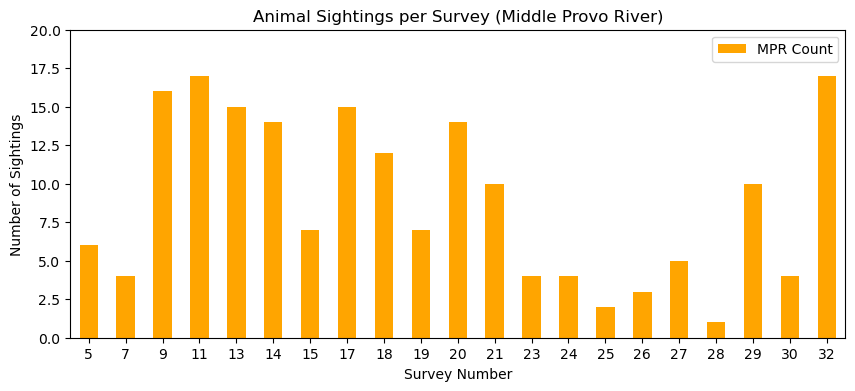

In [619]:
#Create graph of number of animal sightings per survey in the Middle Provo River
mpr_survey_number_totals_df_sorted_graph = mpr_survey_number_totals_df_sorted.plot(kind="bar", facecolor="orange", figsize=(10,4))
plt.title("Animal Sightings per Survey (Middle Provo River)")
plt.xlabel("Survey Number")
plt.xticks(rotation=0)
plt.ylabel("Number of Sightings")
plt.ylim(0,20)

In [469]:
#Create a dataframe of the total number of animal sightings per species sighted at the Middle Provo River
mpr_animal_sighted_totals_df = pd.DataFrame(middle_provo_river_df["Animal Sighted"].value_counts())
mpr_animal_sighted_totals_df.columns =["MPR Count"]
mpr_animal_sighted_totals_df

,MPR Count
Animal Sighted,
Beaver,17
Yellow Headed Blackbird,17
Sandhill Crane,16
Killdeer,13
Unidentified Bird,10
Black Bear,9
Osprey,9
Eagle,8
Otter,7


In [470]:
#Get a count of the total animal sightings in the Middle Provo River
mpr_total_animal_sightings_count = middle_provo_river_df["Animal Sighted"].count()
mpr_total_animal_sightings_count

187

In [683]:
#Get a count of the number of different survey #s for the Middle Provo River
mpr_survey_number_list = middle_provo_river_df["Survey #"].unique()

mpr_survey_number_list_sorted = sorted(mpr_survey_number_list)
mpr_survey_number_list_sorted
mpr_survey_number_list_sorted_count = len(mpr_survey_number_list_sorted)
mpr_survey_number_list_sorted_count

21

In [681]:
#Get a count of the total number of different species sighted at the Middle Provo River
mpr_animal_sighted_list = middle_provo_river_df["Animal Sighted"].unique()
mpr_animal_sighted_list_count = len(mpr_animal_sighted_list)
mpr_animal_sighted_list_count

44

In [472]:
#
mpr_animal_sighted_totals = middle_provo_river_df["Animal Sighted"].value_counts()
mpr_animal_sighted_totals

Animal Sighted
Beaver                     17
Yellow Headed Blackbird    17
Sandhill Crane             16
Killdeer                   13
Unidentified Bird          10
Black Bear                  9
Osprey                      9
Eagle                       8
Otter                       7
Elk                         7
Magpie                      5
Muskrat                     5
Owl                         5
Domestic Cat                5
Unidentified Duck           4
Mallard Duck                4
Finch                       4
Hawk (unidentified)         4
Bullock's Oriole            3
Bobcat                      3
Mountain Lion               2
Swallow                     2
Bat                         2
Moth                        2
Great Blue Heron            2
Dark-eyed Junco             2
Mouse                       2
Raccoon                     2
Unidentified Dove           1
American Wigeon             1
Gadwall Ducks               1
American Dipper             1
Red-Winged Blackbird     

(0.0, 25.0)

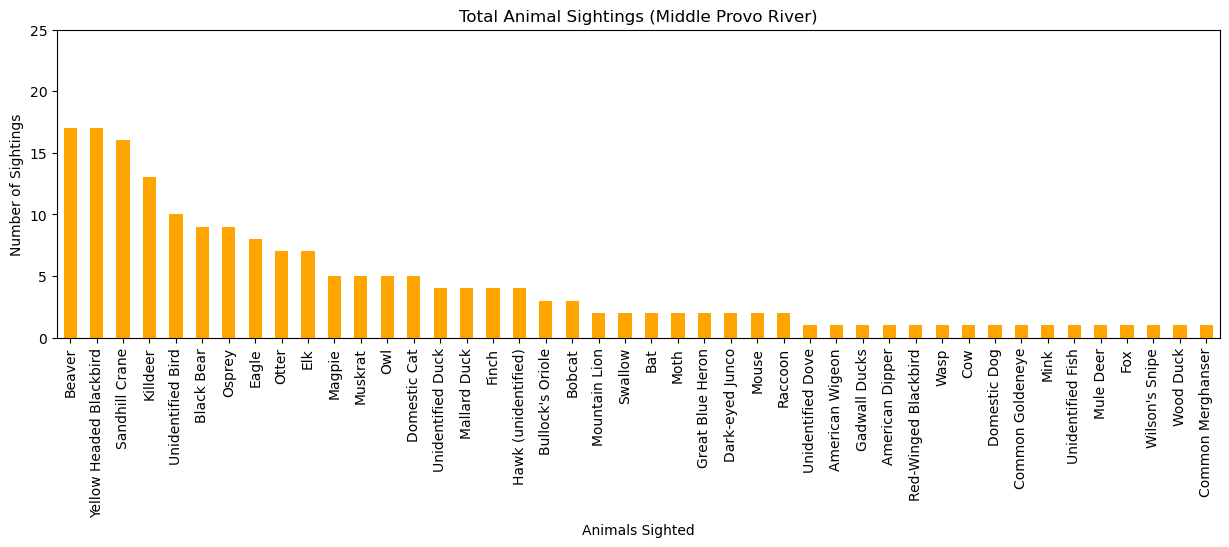

In [595]:
#Graph the total number of animal sightings per species sighted at the Middle Provo River
mpr_animal_sighted_totals_graph = mpr_animal_sighted_totals.plot(kind="bar", facecolor="orange", figsize=(15,4))
plt.title("Total Animal Sightings (Middle Provo River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [474]:
#Create a dataframe of Strawberry River data
strawberry_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Strawberry River"]
strawberry_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
255,Strawberry River,1,8,NaN,Yellow Headed Blackbird,1
256,Strawberry River,1,8,NaN,Beaver,1
257,Strawberry River,1,8,NaN,Sparrow,1
258,Strawberry River,1,8,NaN,Trout,1
259,Strawberry River,1,9,NaN,Unidentified Bird,1
260,Strawberry River,1,9,NaN,Magpie,1
261,Strawberry River,1,9,NaN,Bee,1
262,Strawberry River,1,9,NaN,Muskrat,1
263,Strawberry River,1,9,NaN,Dragonfly,1
264,Strawberry River,2,8 or 9,NaN,Yellow Headed Blackbird,1


In [601]:
#Create a dataframe of the number of animal sightings for each Survey # for the Strawberry River
sr_survey_number_totals_df = pd.DataFrame(strawberry_river_df["Survey #"].value_counts())
sr_survey_number_totals_df.columns =["SR Count"]
sr_survey_number_totals_df

,SR Count
Survey #,
1,9
4,8
5,8
3,4
2,3


In [615]:
#Sort the survey animal sighting counts by ascending Survey # for the Strawberry River
sr_survey_number_totals_df_sorted = sr_survey_number_totals_df.sort_values(["Survey #"], ascending=True)
sr_survey_number_totals_df_sorted

,SR Count
Survey #,
1,9
2,3
3,4
4,8
5,8


In [625]:
#Get summary statistics of Strawberry River survey animal sighting counts
sr_survey_number_totals_df_sorted.describe()

,SR Count
count,5.000000
mean,6.400000
std,2.701851
min,3.000000
25%,4.000000
50%,8.000000
75%,8.000000
max,9.000000


(0.0, 20.0)

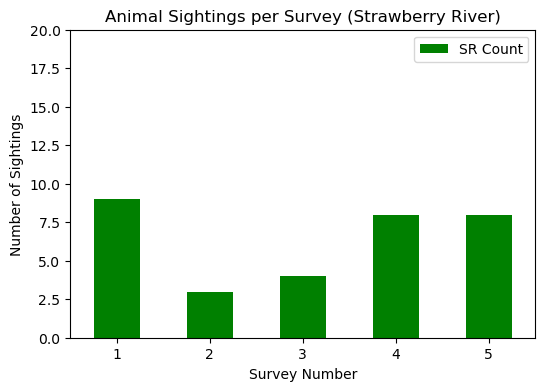

In [616]:
#Graph Strawberry River animal sighting counts per Survey # 
sr_survey_number_totals_df_sorted_graph = sr_survey_number_totals_df_sorted.plot(kind="bar", facecolor="green", figsize=(6,4))
plt.title("Animal Sightings per Survey (Strawberry River)")
plt.xlabel("Survey Number")
plt.xticks(rotation=0)
plt.ylabel("Number of Sightings")
plt.ylim(0,20)

In [475]:
#Create a dataframe of the total number of animal sightings for each species sighted at the Strawberry River
sr_animal_sighted_totals_df = pd.DataFrame(strawberry_river_df["Animal Sighted"].value_counts())
sr_animal_sighted_totals_df.columns =["SR Count"]
sr_animal_sighted_totals_df

,SR Count
Animal Sighted,
Yellow Headed Blackbird,5
Canada Goose,5
Beaver,3
Magpie,2
Muskrat,2
Finch,2
Unidentified Dove,1
Eagle,1
Robin,1


In [476]:
#Get a count of the total number of animal sightings at the Strawberry River
sr_total_animal_sightings_count = strawberry_river_df["Animal Sighted"].count()
sr_total_animal_sightings_count

32

In [685]:
#Get a count of the number of different animal species sighted at the Strawberry River
sr_animal_sighted_list = strawberry_river_df["Animal Sighted"].unique()
sr_animal_sighted_list_count = len(sr_animal_sighted_list)
sr_animal_sighted_list_count

19

In [477]:
#Get a list of different survey #s at the Strawberry River
sr_survey_number_list = strawberry_river_df["Survey #"].unique()

sr_survey_number_list_sorted = sorted(sr_survey_number_list)
sr_survey_number_list_sorted

[1, 2, 3, 4, 5]

In [478]:
#Get counts of animal sightings per species sighted at the Strawberry River
sr_animal_sighted_totals = strawberry_river_df["Animal Sighted"].value_counts()
sr_animal_sighted_totals

Animal Sighted
Yellow Headed Blackbird    5
Canada Goose               5
Beaver                     3
Magpie                     2
Muskrat                    2
Finch                      2
Unidentified Dove          1
Eagle                      1
Robin                      1
American Coot              1
Red-Winged Blackbird       1
Hummingbird                1
Sandhill Crane             1
Dragonfly                  1
Bee                        1
Unidentified Bird          1
Trout                      1
Sparrow                    1
Spotted Sandpiper          1
Name: count, dtype: int64

(0.0, 25.0)

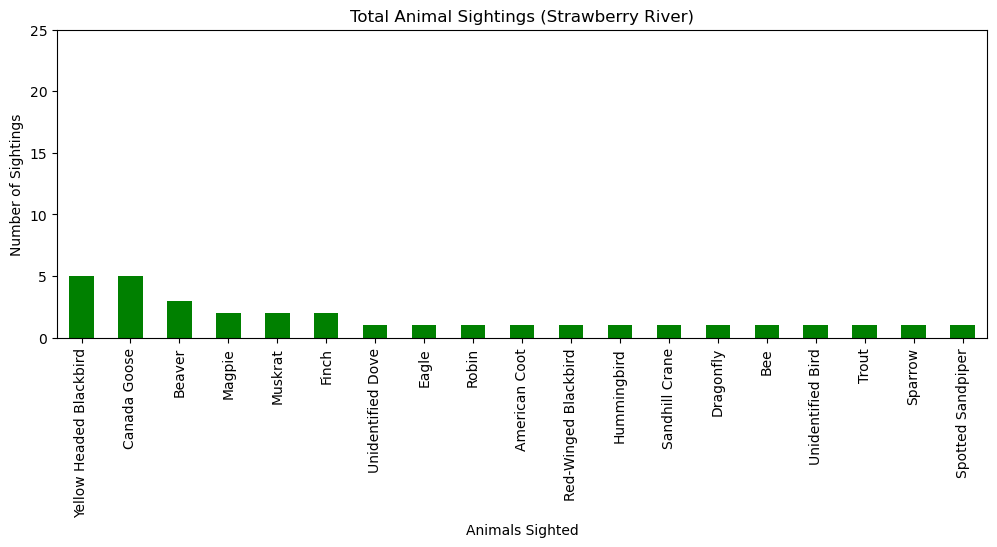

In [594]:
#Graph total animal sightings for each species sighted at the Strawberry River
sr_animal_sighted_totals_graph = sr_animal_sighted_totals.plot(kind="bar", facecolor="green", figsize=(12,4))
plt.title("Total Animal Sightings (Strawberry River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [480]:
#Create a dataframe of Weber River Data
weber_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Weber River"]
weber_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
287,Weber River,1,1,NaN,Killdeer,1
288,Weber River,1,2,NaN,Killdeer,1
289,Weber River,2,1,NaN,Yellow Headed Blackbird,1
290,Weber River,2,1,NaN,Eagle,1
291,Weber River,2,1,NaN,Magpie,1
292,Weber River,2,2,NaN,Killdeer,1
293,Weber River,2,2,NaN,Eagle,1
294,Weber River,2,2,NaN,Great-Tailed Grackle,1
295,Weber River,2,2,NaN,Finch,1
296,Weber River,2,2,NaN,Bullock's Oriole,1


In [602]:
#Get animal sighting counts for each survey # at the Weber River
wr_survey_number_totals_df = pd.DataFrame(weber_river_df["Survey #"].value_counts())
wr_survey_number_totals_df.columns =["WR Count"]
wr_survey_number_totals_df

,WR Count
Survey #,
2,8
8,4
6,3
1,2
3,2
4,2
7,1


In [610]:
#Sort survey animal sighted counts by ascending Survey #
wr_survey_number_totals_df_sorted = wr_survey_number_totals_df.sort_values(["Survey #"], ascending=True)
wr_survey_number_totals_df_sorted

,WR Count
Survey #,
1,2
2,8
3,2
4,2
6,3
7,1
8,4


In [626]:
#Get summary stats of Weber River survey animal sighted counts
wr_survey_number_totals_df_sorted.describe()

,WR Count
count,7.000000
mean,3.142857
std,2.340126
min,1.000000
25%,2.000000
50%,2.000000
75%,3.500000
max,8.000000


(0.0, 20.0)

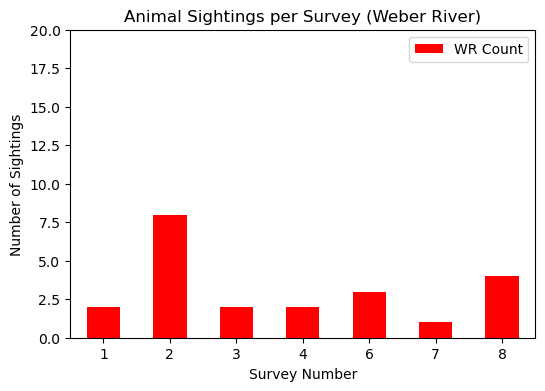

In [614]:
#Graph survey animal sighted counts per survey # at the Weber River
wr_survey_number_totals_df_sorted_graph = wr_survey_number_totals_df_sorted.plot(kind="bar", facecolor="red", figsize=(6,4))
plt.title("Animal Sightings per Survey (Weber River)")
plt.xlabel("Survey Number")
plt.xticks(rotation=0)
plt.ylabel("Number of Sightings")
plt.ylim(0,20)

In [482]:
#Create a dataframe of number of animal sightings for each species sighted at the Weber River
wr_animal_sighted_totals_df = pd.DataFrame(weber_river_df["Animal Sighted"].value_counts())
wr_animal_sighted_totals_df.columns =["WRCount"]
wr_animal_sighted_totals_df

,WR Count
Animal Sighted,
Killdeer,6
Eagle,5
Yellow Headed Blackbird,3
Magpie,3
Great-Tailed Grackle,1
Finch,1
Bullock's Oriole,1
Domestic Cat,1
Elk,1


In [483]:
#Get a count of the total number of animal sightings at the Weber River
wr_total_animal_sightings_count = weber_river_df["Animal Sighted"].count()
wr_total_animal_sightings_count

22

In [684]:
#Get a count of the number of different species sighted at the Weber River
wr_animal_sighted_list = weber_river_df["Animal Sighted"].unique()
wr_animal_sighted_list_count = len(wr_animal_sighted_list)
wr_animal_sighted_list_count

9

In [484]:
#Get a list of Survey #s at the Weber River
wr_survey_number_list = weber_river_df["Survey #"].unique()

wr_survey_number_list_sorted = sorted(wr_survey_number_list)
wr_survey_number_list_sorted

[1, 2, 3, 4, 6, 7, 8]

In [485]:
#Get totals of total number of animal sightings for each species sighted at the Weber River
wr_animal_sighted_totals = weber_river_df["Animal Sighted"].value_counts()
wr_animal_sighted_totals

Animal Sighted
Killdeer                   6
Eagle                      5
Yellow Headed Blackbird    3
Magpie                     3
Great-Tailed Grackle       1
Finch                      1
Bullock's Oriole           1
Domestic Cat               1
Elk                        1
Name: count, dtype: int64

(0.0, 25.0)

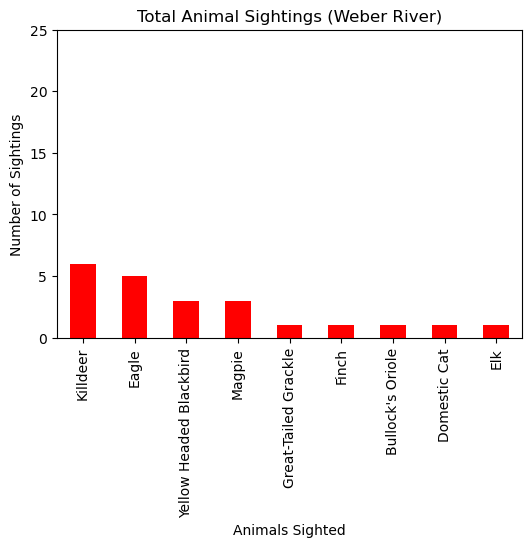

In [486]:
#Graph the total number of animal sightings for each species sighted at the Weber River
wr_animal_sighted_totals_graph = wr_animal_sighted_totals.plot(kind="bar", facecolor="red", figsize=(6,4))
plt.title("Total Animal Sightings (Weber River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [494]:
#Merge dataframes of animal sighting totals for each Location into one DataFrame
lpr_mpr_animal_sighted_totals = pd.merge(lpr_animal_sighted_totals_df, mpr_animal_sighted_totals_df, on="Animal Sighted", how="outer")
lpr_mpr_sr_animal_sighted_totals = pd.merge(lpr_mpr_animal_sighted_totals, sr_animal_sighted_totals_df, on="Animal Sighted", how="outer")
lpr_mpr_sr_wr_animal_sighted_totals = pd.merge(lpr_mpr_sr_animal_sighted_totals, wr_animal_sighted_totals_df, on="Animal Sighted", how="outer")
lpr_mpr_sr_wr_animal_sighted_totals

,LPR Count,MPR Count,SR Count,WR Count
Animal Sighted,,,,
American Coot,NaN,NaN,1.0,NaN
American Dipper,NaN,1.0,NaN,NaN
American Wigeon,NaN,1.0,NaN,NaN
Bat,1.0,2.0,NaN,NaN
Beaver,7.0,17.0,3.0,NaN
...,...,...,...,...
Unidentified Rodent,1.0,NaN,NaN,NaN
Wasp,NaN,1.0,NaN,NaN
Wilson's Snipe,NaN,1.0,NaN,NaN


In [492]:
#Fill NaNs in merged DataFrame of animal sighting total counts w/ 0
lpr_mpr_sr_wr_animal_sighted_totals_filled = lpr_mpr_sr_wr_animal_sighted_totals.fillna(0)
lpr_mpr_sr_wr_animal_sighted_totals_filled

,LPR Count,MPR Count,SR Count,WR Count
Animal Sighted,,,,
American Coot,0.0,0.0,1.0,0.0
American Dipper,0.0,1.0,0.0,0.0
American Wigeon,0.0,1.0,0.0,0.0
Bat,1.0,2.0,0.0,0.0
Beaver,7.0,17.0,3.0,0.0
...,...,...,...,...
Unidentified Rodent,1.0,0.0,0.0,0.0
Wasp,0.0,1.0,0.0,0.0
Wilson's Snipe,0.0,1.0,0.0,0.0


In [520]:
#Get summary statistics of animal sighting total counts for all locations
lpr_mpr_sr_wr_animal_sighted_totals_filled.describe()

,LPR Count,MPR Count,SR Count,WR Count
count,61.000000,61.000000,61.000000,61.000000
mean,1.114754,3.065574,0.524590,0.360656
std,1.915710,4.249976,1.058404,1.125948
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,0.000000
max,7.000000,17.000000,5.000000,6.000000


In [691]:
#Sort animal sighting total counts for each location Dataframe by animal species most frequently sighted, descending
lpr_mpr_sr_wr_animal_sighted_totals_filled_sorted = lpr_mpr_sr_wr_animal_sighted_totals_filled.sort_values(["MPR Count", "LPR Count", "SR Count", "WR Count"], ascending=False)
lpr_mpr_sr_wr_animal_sighted_totals_filled_sorted

,LPR Count,MPR Count,SR Count,WR Count
Animal Sighted,,,,
Beaver,7.0,17.0,3.0,0.0
Yellow Headed Blackbird,5.0,17.0,5.0,3.0
Sandhill Crane,2.0,16.0,1.0,0.0
Killdeer,6.0,13.0,0.0,6.0
Unidentified Bird,1.0,10.0,1.0,0.0
...,...,...,...,...
Robin,0.0,0.0,1.0,0.0
Sparrow,0.0,0.0,1.0,0.0
Spotted Sandpiper,0.0,0.0,1.0,0.0


(0.0, 25.0)

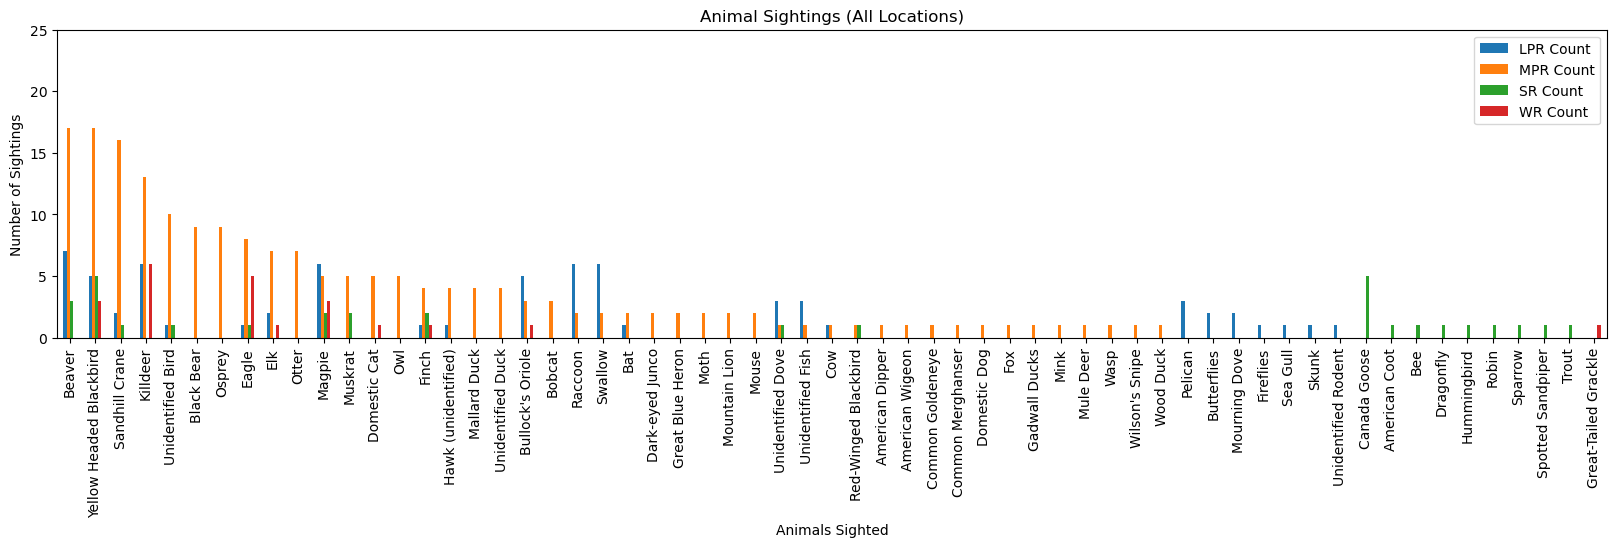

In [692]:
#Graph animal sighted totals for all locations on one Graph
all_location_animal_sighted_totals_graph = lpr_mpr_sr_wr_animal_sighted_totals_filled_sorted.plot(kind="bar", figsize=(20,4))
all_location_animal_sighted_totals_graph
plt.title("Animal Sightings (All Locations)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [693]:
#Identify sites w/ Otter sightings

otter_sites_df = cleaned_otter_data_df[cleaned_otter_data_df["Animal Sighted"] == "Otter"]
otter_sites_df


,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
70,Middle Provo River,5,3,NaN,Otter,1
112,Middle Provo River,13,4,4,Otter,2
122,Middle Provo River,13,3,3,Otter,1
141,Middle Provo River,15,4,NaN,Otter,1
150,Middle Provo River,17,3,NaN,Otter,1
162,Middle Provo River,18,3,NaN,Otter,1
239,Middle Provo River,32,old,NaN,Otter,1


In [503]:
#Create new dataframe with all data from Otter Sites only

animal_sighted_survey_5_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 5][middle_provo_river_df["Animal Sighted"] != "Otter"]
animal_sighted_survey_13_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 13][middle_provo_river_df["Animal Sighted"] != "Otter"]
animal_sighted_survey_15_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 15][middle_provo_river_df["Animal Sighted"] != "Otter"]
animal_sighted_survey_17_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 17][middle_provo_river_df["Animal Sighted"] != "Otter"]
animal_sighted_survey_18_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 18][middle_provo_river_df["Animal Sighted"] != "Otter"]
animal_sighted_survey_32_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 32][middle_provo_river_df["Animal Sighted"] != "Otter"]



animal_sighted_otter_survey_list = [
    animal_sighted_survey_5_df,
    animal_sighted_survey_13_df,
    animal_sighted_survey_15_df,
    animal_sighted_survey_17_df,
    animal_sighted_survey_18_df,
    animal_sighted_survey_32_df
]

merged_otter_site_df = pd.concat(animal_sighted_otter_survey_list)

merged_otter_site_df

C:\Users\camih\AppData\Local\Temp\ipykernel_49832\1495574698.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  animal_sighted_survey_5_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 5][middle_provo_river_df["Animal Sighted"] != "Otter"]
C:\Users\camih\AppData\Local\Temp\ipykernel_49832\1495574698.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  animal_sighted_survey_13_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 13][middle_provo_river_df["Animal Sighted"] != "Otter"]
C:\Users\camih\AppData\Local\Temp\ipykernel_49832\1495574698.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  animal_sighted_survey_15_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 15][middle_provo_river_df["Animal Sighted"] != "Otter"]
C:\Users\camih\AppData\Local\Temp\ipykernel_49832\1495574698.py:6: UserWarning: Boolean Series key will be reindexed to match DataFr

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
68,Middle Provo River,5,3,NaN,Sandhill Crane,1
69,Middle Provo River,5,3,NaN,Osprey,2
71,Middle Provo River,5,3,NaN,Magpie,1
72,Middle Provo River,5,3,NaN,Black Bear,1
73,Middle Provo River,5,3,NaN,Bobcat,1
...,...,...,...,...,...,...
250,Middle Provo River,32,New 1,NaN,Black Bear,1
251,Middle Provo River,32,New 1,NaN,Bat,1
252,Middle Provo River,32,New 1,NaN,Osprey,1
253,Middle Provo River,32,New 2,NaN,Sandhill Crane,1


In [504]:
#Create a new dataframe of total number of animal sightings for each species sighted at Otter Sites
os_animal_sighted_totals_df = pd.DataFrame(merged_otter_site_df["Animal Sighted"].value_counts())
os_animal_sighted_totals_df.columns =["Count"]
os_animal_sighted_totals_df

,Count
Animal Sighted,
Osprey,9
Sandhill Crane,6
Unidentified Bird,5
Muskrat,4
Yellow Headed Blackbird,4
Killdeer,4
Elk,3
Black Bear,3
Mallard Duck,2


In [505]:
#Get a count of the total number of animal sightings at Otter Sites
os_total_animal_sightings_count = merged_otter_site_df["Animal Sighted"].count()
os_total_animal_sightings_count

65

In [506]:
# Create a new column for sighting probability for each animal sighted at otter sites:
os_animal_sighted_totals_df["Otter Sites"] = os_animal_sighted_totals_df["Count"] / os_total_animal_sightings_count
os_sighting_probabilities = os_animal_sighted_totals_df.drop(["Count"], axis=1)
os_sighting_probabilities


,Otter Sites
Animal Sighted,
Osprey,0.138462
Sandhill Crane,0.092308
Unidentified Bird,0.076923
Muskrat,0.061538
Yellow Headed Blackbird,0.061538
Killdeer,0.061538
Elk,0.046154
Black Bear,0.046154
Mallard Duck,0.030769


In [507]:
#Get total counts of animal sightings for each animal species sighted at Otter Sites
otter_site_animal_sighted_totals = merged_otter_site_df["Animal Sighted"].value_counts()
otter_site_animal_sighted_totals

Animal Sighted
Osprey                     9
Sandhill Crane             6
Unidentified Bird          5
Muskrat                    4
Yellow Headed Blackbird    4
Killdeer                   4
Elk                        3
Black Bear                 3
Mallard Duck               2
Dark-eyed Junco            2
Bobcat                     2
Owl                        2
Magpie                     2
Mountain Lion              2
Swallow                    2
Bat                        1
Great Blue Heron           1
Finch                      1
Unidentified Duck          1
Mouse                      1
Fox                        1
Wilson's Snipe             1
Eagle                      1
Wood Duck                  1
Domestic Dog               1
Mule Deer                  1
Hawk (unidentified)        1
Common Merghanser          1
Name: count, dtype: int64

In [573]:
#Create a DataFrame of total number of animal sightings for each animal species sighted at Otter Sites
otter_sites_animal_sighted_totals_df = pd.DataFrame(otter_site_animal_sighted_totals)
otter_sites_animal_sighted_totals_df = otter_sites_animal_sighted_totals_df.rename(columns={"count": "Otter Site"})
otter_sites_animal_sighted_totals_df

,Otter Site
Animal Sighted,
Osprey,9
Sandhill Crane,6
Unidentified Bird,5
Muskrat,4
Yellow Headed Blackbird,4
Killdeer,4
Elk,3
Black Bear,3
Mallard Duck,2


(0.0, 25.0)

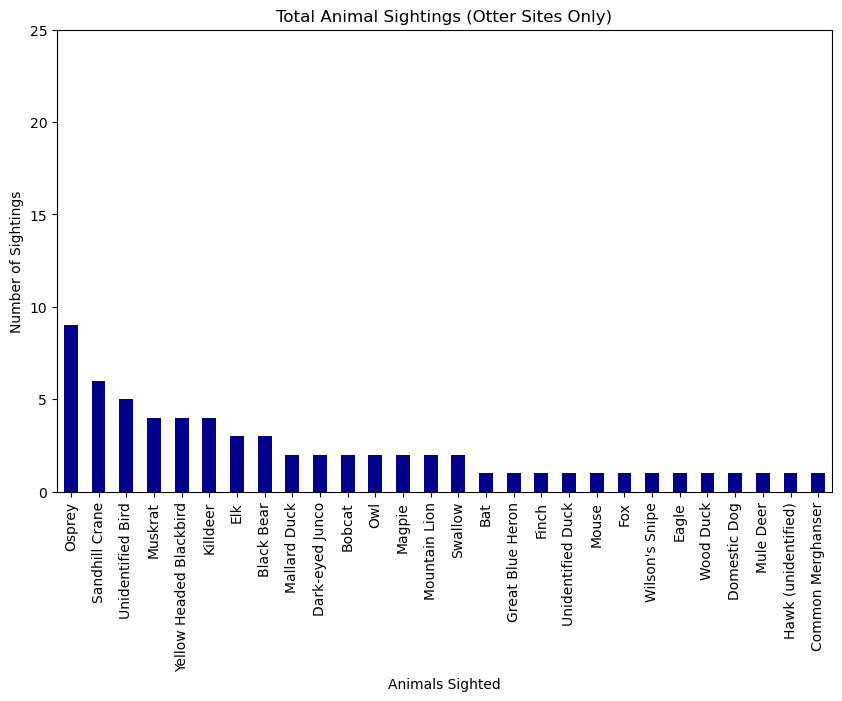

In [593]:
#Graph the total number of animal sightings for each species sighted at Otter Sites
otter_site_animal_sighted_totals_graph = otter_site_animal_sighted_totals.plot(kind="bar", facecolor="darkblue", figsize=(10,6))
plt.title("Total Animal Sightings (Otter Sites Only)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [636]:
#Identify sites w/out Otter sightings in the middle prover river.

mpr_non_otter_sites_df =middle_provo_river_df[middle_provo_river_df["Survey #"] != 5][middle_provo_river_df["Survey #"] != 13][middle_provo_river_df["Survey #"] != 15][middle_provo_river_df["Survey #"] != 17][middle_provo_river_df["Survey #"] != 18][middle_provo_river_df["Survey #"] != 32]
mpr_non_otter_sites_df


C:\Users\camih\AppData\Local\Temp\ipykernel_49832\1996002061.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mpr_non_otter_sites_df =middle_provo_river_df[middle_provo_river_df["Survey #"] != 5][middle_provo_river_df["Survey #"] != 13][middle_provo_river_df["Survey #"] != 15][middle_provo_river_df["Survey #"] != 17][middle_provo_river_df["Survey #"] != 18][middle_provo_river_df["Survey #"] != 32]
C:\Users\camih\AppData\Local\Temp\ipykernel_49832\1996002061.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mpr_non_otter_sites_df =middle_provo_river_df[middle_provo_river_df["Survey #"] != 5][middle_provo_river_df["Survey #"] != 13][middle_provo_river_df["Survey #"] != 15][middle_provo_river_df["Survey #"] != 17][middle_provo_river_df["Survey #"] != 18][middle_provo_river_df["Survey #"] != 32]
C:\Users\camih\AppData\Local\Temp\ipykernel_49832\1996002061.py:3: UserWarning: Boolean Series key will be reindexed to match Da

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
74,Middle Provo River,7,3,NaN,Black Bear,1
75,Middle Provo River,7,3,NaN,Hawk (unidentified),1
76,Middle Provo River,7,3,NaN,Wasp,1
77,Middle Provo River,7,4,NaN,Beaver,6
78,Middle Provo River,9,4,4,Sandhill Crane,1
...,...,...,...,...,...,...
233,Middle Provo River,29,2,NaN,Finch,1
234,Middle Provo River,30,NaN,NaN,Mallard Duck,1
235,Middle Provo River,30,NaN,NaN,Beaver,1
236,Middle Provo River,30,NaN,NaN,Muskrat,1


In [640]:
#Create a DataFrame of total number of animal sightings of each species sighted at Non-Otter Sites at the Middle Provo River
non_os_animal_sighted_totals_df = pd.DataFrame(mpr_non_otter_sites_df["Animal Sighted"].value_counts())
non_os_animal_sighted_totals_df.columns =["MPR Non-Otter Site"]
non_os_animal_sighted_totals_df

,MPR Non-Otter Site
Animal Sighted,
Beaver,17
Yellow Headed Blackbird,13
Sandhill Crane,10
Killdeer,9
Eagle,7
Black Bear,6
Unidentified Bird,5
Domestic Cat,5
Elk,4


In [641]:
#Get counts of the total number of animal sightings of each species sighted at Non-Otter sites at the Middle Provo River
mpr_non_otter_sites_animal_sighted_totals = mpr_non_otter_sites_df["Animal Sighted"].value_counts()
mpr_non_otter_sites_animal_sighted_totals

Animal Sighted
Beaver                     17
Yellow Headed Blackbird    13
Sandhill Crane             10
Killdeer                    9
Eagle                       7
Black Bear                  6
Unidentified Bird           5
Domestic Cat                5
Elk                         4
Unidentified Duck           3
Hawk (unidentified)         3
Magpie                      3
Bullock's Oriole            3
Finch                       3
Owl                         3
Moth                        2
Mallard Duck                2
Raccoon                     2
Mink                        1
American Wigeon             1
Gadwall Ducks               1
American Dipper             1
Red-Winged Blackbird        1
Great Blue Heron            1
Bat                         1
Unidentified Dove           1
Common Goldeneye            1
Bobcat                      1
Wasp                        1
Mouse                       1
Cow                         1
Unidentified Fish           1
Muskrat                  

(0.0, 25.0)

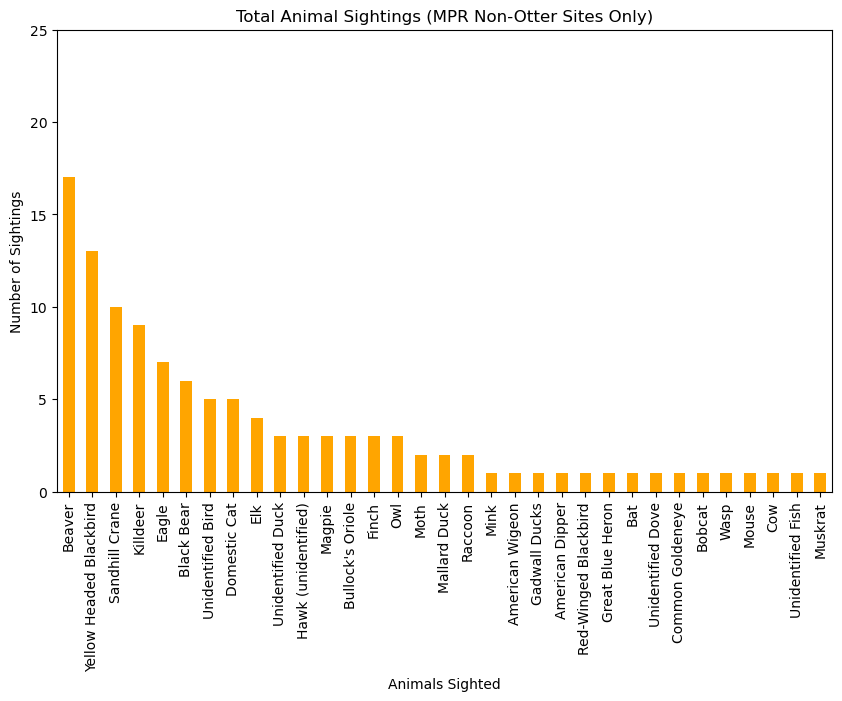

In [643]:
#Graph the total number of animal sightings of each species sighted at Non-Otter sites at the Middle Provo River
mpr_non_otter_sites_animal_sighted_totals_graph = mpr_non_otter_sites_animal_sighted_totals.plot(kind="bar", facecolor="orange", figsize=(10,6))
plt.title("Total Animal Sightings (MPR Non-Otter Sites Only)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [648]:
#Merge the Otter Site animal sighting dataframe and Middle Provo River Non-Otter Site animal sighting dataframe
os_mpr_non_os_animal_sighted_totals = pd.merge(otter_sites_animal_sighted_totals_df, non_os_animal_sighted_totals_df, on="Animal Sighted", how="outer")
os_mpr_non_os_animal_sighted_totals

,Otter Site,MPR Non-Otter Site
Animal Sighted,,
American Dipper,NaN,1.0
American Wigeon,NaN,1.0
Bat,1.0,1.0
Beaver,NaN,17.0
Black Bear,3.0,6.0
Bobcat,2.0,1.0
Bullock's Oriole,NaN,3.0
Common Goldeneye,NaN,1.0
Common Merghanser,1.0,NaN


In [649]:
#Replace NaN values in new merged Otter Site/Non-Otter Site dataframe with 0s
os_mpr_non_os_animal_sighted_totals_filled = os_mpr_non_os_animal_sighted_totals.fillna(0)
os_mpr_non_os_animal_sighted_totals_filled

,Otter Site,MPR Non-Otter Site
Animal Sighted,,
American Dipper,0.0,1.0
American Wigeon,0.0,1.0
Bat,1.0,1.0
Beaver,0.0,17.0
Black Bear,3.0,6.0
Bobcat,2.0,1.0
Bullock's Oriole,0.0,3.0
Common Goldeneye,0.0,1.0
Common Merghanser,1.0,0.0


In [651]:
#Sort values in Otter Site/Non-Otter Site dataframe descending from most frequently sighted animal species down in the Otter Site column
os_mpr_non_os_animal_sighted_totals_filled_sorted = os_mpr_non_os_animal_sighted_totals_filled.sort_values(["Otter Site", "MPR Non-Otter Site"], ascending=False)
os_mpr_non_os_animal_sighted_totals_filled_sorted

,Otter Site,MPR Non-Otter Site
Animal Sighted,,
Osprey,9.0,0.0
Sandhill Crane,6.0,10.0
Unidentified Bird,5.0,5.0
Yellow Headed Blackbird,4.0,13.0
Killdeer,4.0,9.0
Muskrat,4.0,1.0
Black Bear,3.0,6.0
Elk,3.0,4.0
Magpie,2.0,3.0


In [652]:
#Get summary statistics on Otter Site/Non-Otter Site dataframe
os_mpr_non_os_animal_sighted_totals_filled_sorted.describe()

,Otter Site,MPR Non-Otter Site
count,43.000000,43.000000
mean,1.511628,2.674419
std,1.894504,3.662688
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,9.000000,17.000000


(0.0, 20.0)

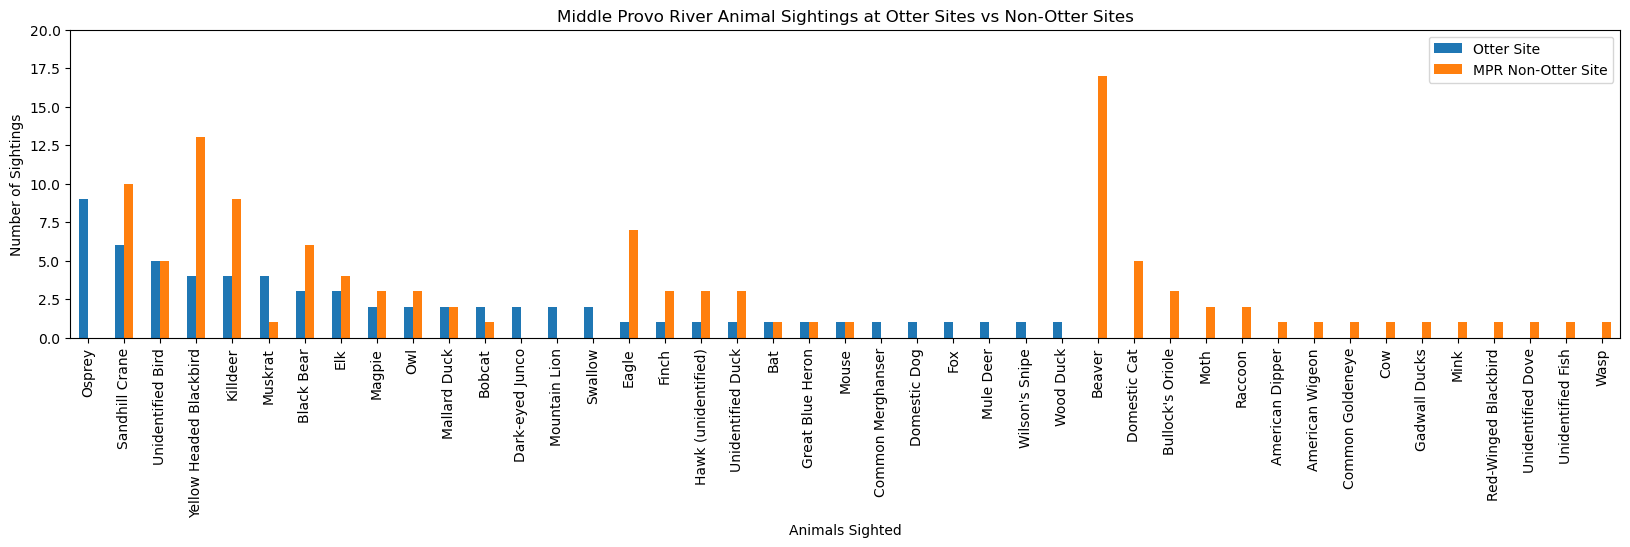

In [698]:
#Graph the number of animal sightings for each species at both Otter Sites and Middle Provo River Non-Otter sites with different colored bar graphs for Otter Sites and Non-Otter Sites
os_mpr_non_os_animal_sighted_totals_filled_sorted_graph = os_mpr_non_os_animal_sighted_totals_filled_sorted.plot(kind="bar", figsize=(20,4))
os_mpr_non_os_animal_sighted_totals_filled_sorted
plt.title("Middle Provo River Animal Sightings at Otter Sites vs Non-Otter Sites")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,20)

In [699]:
#Get the total number of animal sightings at Non-Otter sites on the Middle Provo River 
non_os_total_animal_sightings_count = mpr_non_otter_sites_df["Animal Sighted"].count()
non_os_total_animal_sightings_count

115

In [700]:
# Create a new column for sighting probability for each animal sighted at non-otter sites:
non_os_animal_sighted_totals_df["Non-Otter Sites"] = non_os_animal_sighted_totals_df["MPR Non-Otter Site"] / non_os_total_animal_sightings_count
non_os_sighting_probabilities = non_os_animal_sighted_totals_df.drop(["MPR Non-Otter Site"], axis=1)
non_os_sighting_probabilities

,Non-Otter Sites
Animal Sighted,
Beaver,0.147826
Yellow Headed Blackbird,0.113043
Sandhill Crane,0.086957
Killdeer,0.078261
Eagle,0.060870
Black Bear,0.052174
Unidentified Bird,0.043478
Domestic Cat,0.043478
Elk,0.034783


In [702]:
#Merge dataframes to compile Otter Site animal sighting probabilities and Non-Otter site animal sighting probabilities
os_non_os_sighting_probabilities = pd.merge(os_sighting_probabilities, non_os_sighting_probabilities, on="Animal Sighted", how="outer")
os_non_os_sighting_probabilities

,Otter Sites,Non-Otter Sites
Animal Sighted,,
American Dipper,NaN,0.008696
American Wigeon,NaN,0.008696
Bat,0.015385,0.008696
Beaver,NaN,0.147826
Black Bear,0.046154,0.052174
Bobcat,0.030769,0.008696
Bullock's Oriole,NaN,0.026087
Common Goldeneye,NaN,0.008696
Common Merghanser,0.015385,NaN


In [703]:
#Fill NaN values in new probability dataframe w/ 0s
os_non_os_sighting_probabilities_filled = os_non_os_sighting_probabilities.fillna(0)
os_non_os_sighting_probabilities_filled

,Otter Sites,Non-Otter Sites
Animal Sighted,,
American Dipper,0.000000,0.008696
American Wigeon,0.000000,0.008696
Bat,0.015385,0.008696
Beaver,0.000000,0.147826
Black Bear,0.046154,0.052174
Bobcat,0.030769,0.008696
Bullock's Oriole,0.000000,0.026087
Common Goldeneye,0.000000,0.008696
Common Merghanser,0.015385,0.000000


In [704]:
#Sort Otter Site/Non-Otter Site probabilities in descending order
os_non_os_sighting_probabilities_filled_sorted = os_non_os_sighting_probabilities_filled.sort_values(["Otter Sites", "Non-Otter Sites"], ascending=False)
os_non_os_sighting_probabilities_filled_sorted

,Otter Sites,Non-Otter Sites
Animal Sighted,,
Osprey,0.138462,0.000000
Sandhill Crane,0.092308,0.086957
Unidentified Bird,0.076923,0.043478
Yellow Headed Blackbird,0.061538,0.113043
Killdeer,0.061538,0.078261
Muskrat,0.061538,0.008696
Black Bear,0.046154,0.052174
Elk,0.046154,0.034783
Magpie,0.030769,0.026087


Text(0.5, 1.0, 'Animal Sighting Probability at Otter Sites vs Non-Otter Sites')

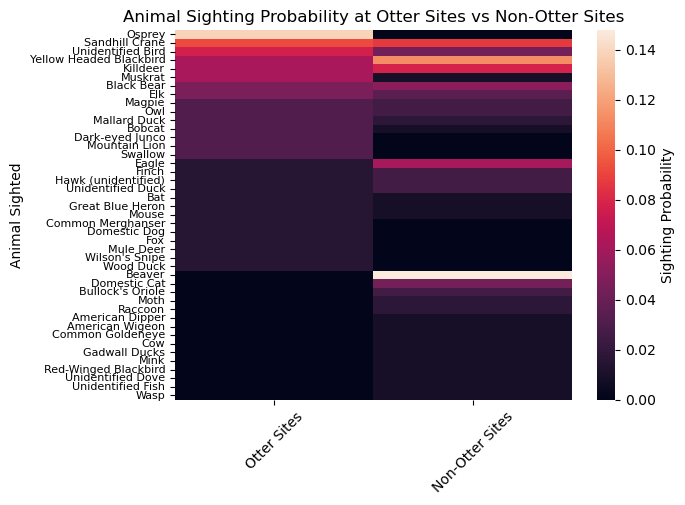

In [705]:
#Plot animal sighting probabilities for each species sighted at Otter Sites and Non-Otter Sites on the Middle Provo River
sns.heatmap(os_non_os_sighting_probabilities_filled_sorted, annot=False, cbar_kws={"label": "Sighting Probability"}, yticklabels=True)
plt.yticks(fontsize = 8)
plt.xticks(rotation=45)
plt.title("Animal Sighting Probability at Otter Sites vs Non-Otter Sites")